In [2]:
#Importing Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from datetime import datetime as dt2
from datetime import timedelta as td
from datetime import time as tm

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import plotly.offline as pyoff
import plotly.graph_objs as go

import feature_engine
from feature_engine.outliers import Winsorizer

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
retail_df = pd.read_excel('Online Retail.xlsx')

In [4]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [61]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      354345 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [6]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
retail_df.dropna(inplace = True)

In [9]:
#Country

retail_df.Country.value_counts(normalize=True) 

United Kingdom          0.889509
Germany                 0.023339
France                  0.020871
EIRE                    0.018398
Spain                   0.006226
Netherlands             0.005828
Belgium                 0.005086
Switzerland             0.004614
Portugal                0.003638
Australia               0.003095
Norway                  0.002669
Italy                   0.001974
Channel Islands         0.001863
Finland                 0.001708
Cyprus                  0.001529
Sweden                  0.001136
Austria                 0.000986
Denmark                 0.000956
Japan                   0.000880
Poland                  0.000838
USA                     0.000715
Israel                  0.000615
Unspecified             0.000600
Singapore               0.000563
Iceland                 0.000447
Canada                  0.000371
Greece                  0.000359
Malta                   0.000312
United Arab Emirates    0.000167
European Community      0.000150
RSA       

In [10]:
retail_df = retail_df[retail_df.Country == 'United Kingdom']

In [11]:
#Quantity

retail_df = retail_df[retail_df['Quantity'] > 0]

In [60]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [62]:
retail_df['InvoiceNo'].str.contains('C').count()

AttributeError: Can only use .str accessor with string values!

In [65]:
retail_df[~retail_df['InvoiceNo'].str.contains('C',na=False)]

AttributeError: Can only use .str accessor with string values!

In [66]:
#timebound

print(retail_df["InvoiceDate"].min())
print(retail_df["InvoiceDate"].max())
print("The data is from 1 year transaction")

2010-12-01 08:26:00
2011-12-09 12:49:00
The data is from 1 year transaction


In [67]:
#UnitPrice

retail_df = retail_df[retail_df.UnitPrice > 0]

In [68]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354321 non-null  object        
 1   StockCode    354321 non-null  object        
 2   Description  354321 non-null  object        
 3   Quantity     354321 non-null  int64         
 4   InvoiceDate  354321 non-null  datetime64[ns]
 5   UnitPrice    354321 non-null  float64       
 6   CustomerID   354321 non-null  float64       
 7   Country      354321 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


##-------------

In [69]:
#Calculating Revenue
#Revenue = Order Count * Average Revenue per Order

retail_df['TotalPrice'] = retail_df['Quantity']*retail_df['UnitPrice']

<Axes: ylabel='TotalPrice'>

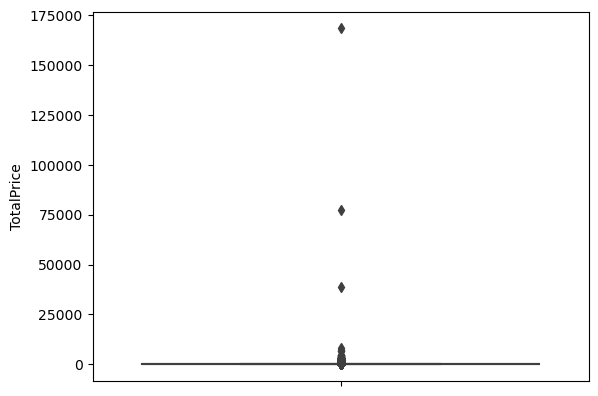

In [70]:
sns.boxplot(y=retail_df['TotalPrice'])

# RFM Analysis

In [71]:
today_day = max(retail_df.InvoiceDate) + dt.timedelta(days = 1)
today_day

Timestamp('2011-12-10 12:49:00')

In [72]:
rfm = retail_df.groupby("CustomerID").agg({"InvoiceDate": lambda date : (today_day-date.max()).days,
                                          "InvoiceNo" : lambda num : num.nunique(),
                                          "TotalPrice" : lambda TotalPrice : TotalPrice.sum()})
rfm

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,326,1,77183.60
12747.0,2,11,4196.01
12748.0,1,209,33719.73
12749.0,4,5,4090.88
12820.0,3,4,942.34
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,2,178.05


In [73]:
rfm.columns = ["Recency","Frequency","Monetary"]
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12747.0,2,11,4196.01
12748.0,1,209,33719.73
12749.0,4,5,4090.88
12820.0,3,4,942.34
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,2,178.05


In [74]:
rfm = rfm.reset_index()

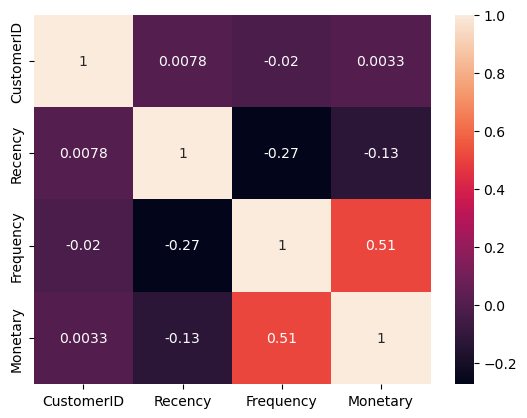

In [75]:
#Heatmap check
sns.heatmap(rfm.corr(), annot=True);

# Modeling Data: K-Means Clustering

#### Data Preprocessing

In [76]:
rfm_new = rfm.drop('CustomerID', axis=1)
rfm_new

,Recency,Frequency,Monetary
0,326,1,77183.60
1,2,11,4196.01
2,1,209,33719.73
3,4,5,4090.88
4,3,4,942.34
...,...,...,...
3915,278,1,180.60
3916,181,1,80.82
3917,8,2,178.05
3918,4,16,2094.88


In [77]:
rfm_new.head()

,Recency,Frequency,Monetary
0,326,1,77183.60
1,2,11,4196.01
2,1,209,33719.73
3,4,5,4090.88
4,3,4,942.34


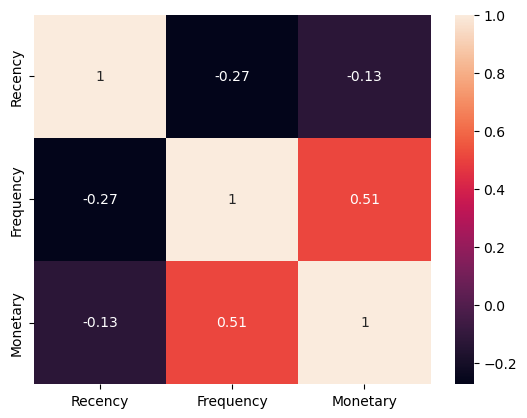

In [78]:
#Heatmap check
sns.heatmap(rfm_new.corr(), annot=True);

<Axes: xlabel='Recency', ylabel='Density'>

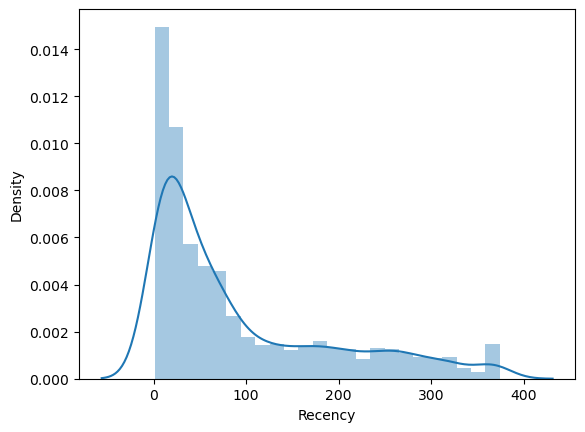

In [79]:
#Analyze distribution

sns.distplot(rfm_new['Recency'])

<Axes: xlabel='Frequency', ylabel='Density'>

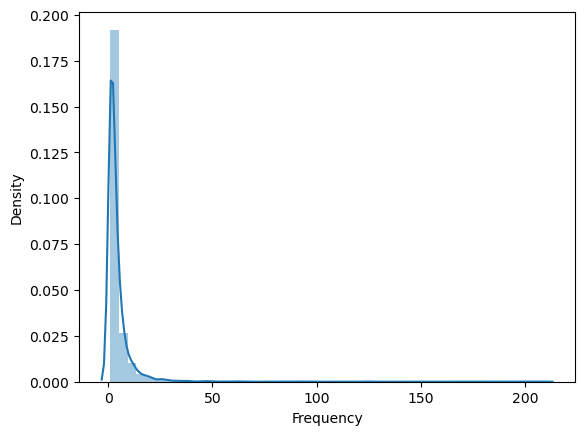

In [80]:
sns.distplot(rfm_new['Frequency'])

<Axes: xlabel='Monetary', ylabel='Density'>

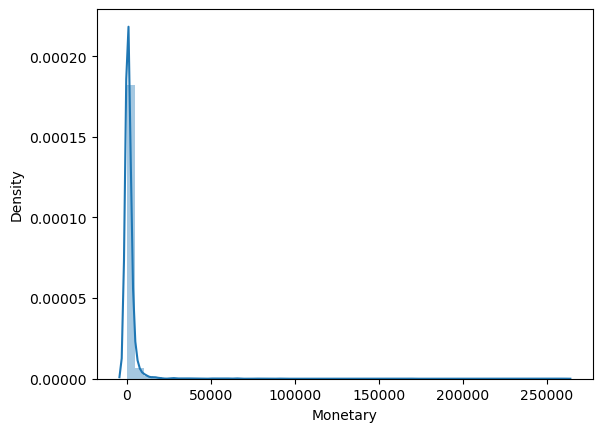

In [81]:
sns.distplot(rfm_new['Monetary'])

In [82]:
df_rfm_log = rfm_new.copy()
df_rfm_log.head()

,Recency,Frequency,Monetary
0,326,1,77183.60
1,2,11,4196.01
2,1,209,33719.73
3,4,5,4090.88
4,3,4,942.34


In [84]:
df_rfm_log = np.log(df_rfm_log+1)

In [85]:
windsoriser = Winsorizer(tail='both', # cap left, right or both tails 
                          fold=2,
                           variables=[ 'Recency', 'Frequency', 'Monetary']
                        )
windsoriser.fit(df_rfm_log)

Winsorizer(fold=2, tail='both', variables=['Recency', 'Frequency', 'Monetary'])

In [87]:
df_rfm_log = windsoriser.transform(df_rfm_log)

In [88]:
#Developing preprocessing with StandardScaler

scaler = StandardScaler()

scaler.fit(df_rfm_log)

RFM_Table_New_scaled = scaler.transform(df_rfm_log)

In [90]:
RFM_Table_New_scaled = pd.DataFrame(RFM_Table_New_scaled, columns=rfm_new.columns)
RFM_Table_New_scaled.describe().round(2)

,Recency,Frequency,Monetary
count,3920.00,3920.00,3920.00
mean,-0.00,0.00,0.00
std,1.00,1.00,1.00
min,-2.22,-1.10,-2.14
25%,-0.56,-1.10,-0.67
50%,0.21,-0.27,0.03
75%,0.84,0.83,0.74
max,1.34,2.08,2.12


<Axes: xlabel='Recency', ylabel='Density'>

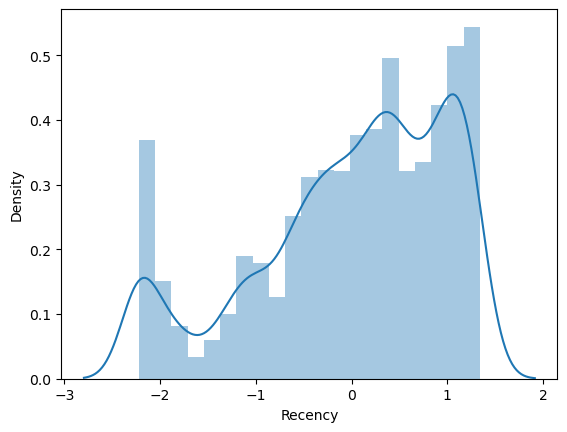

In [91]:
#Analyze distribution

sns.distplot(RFM_Table_New_scaled['Recency'])

<Axes: xlabel='Frequency', ylabel='Density'>

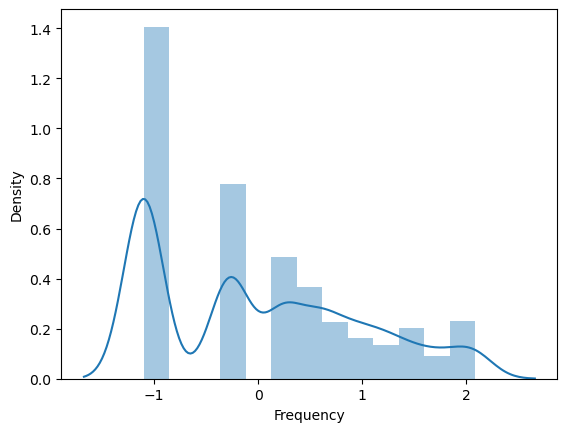

In [92]:
sns.distplot(RFM_Table_New_scaled['Frequency'])

<Axes: xlabel='Monetary', ylabel='Density'>

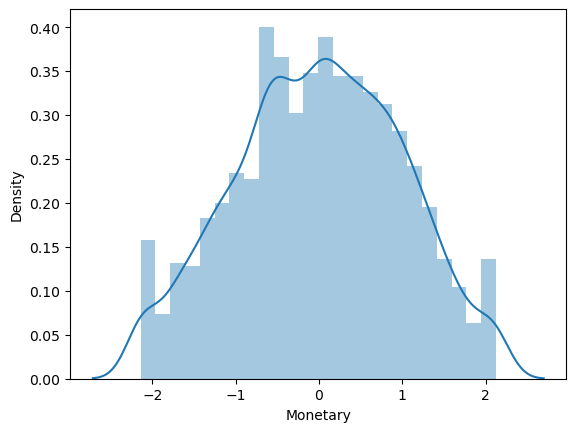

In [93]:
sns.distplot(RFM_Table_New_scaled['Monetary'])

#### Optimal K Cluster

In [37]:
X = np.asarray(RFM_Table_New_scaled)
X

array([[ 1.46531444, -1.01674943,  2.1441837 ],
       [-2.01796219,  1.86888896,  1.55186318],
       [-2.06565763,  2.23259804,  2.1441837 ],
       ...,
       [-1.28923099, -0.36374566, -1.15196725],
       [-1.80422172,  2.23259804,  0.95666298],
       [-0.03972713,  0.09956789,  0.84425433]])

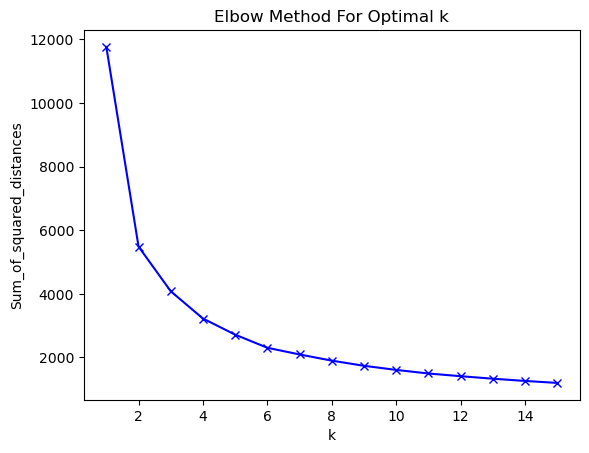

In [38]:
Sum_of_squared_distances = []
K = range(1,16)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [39]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

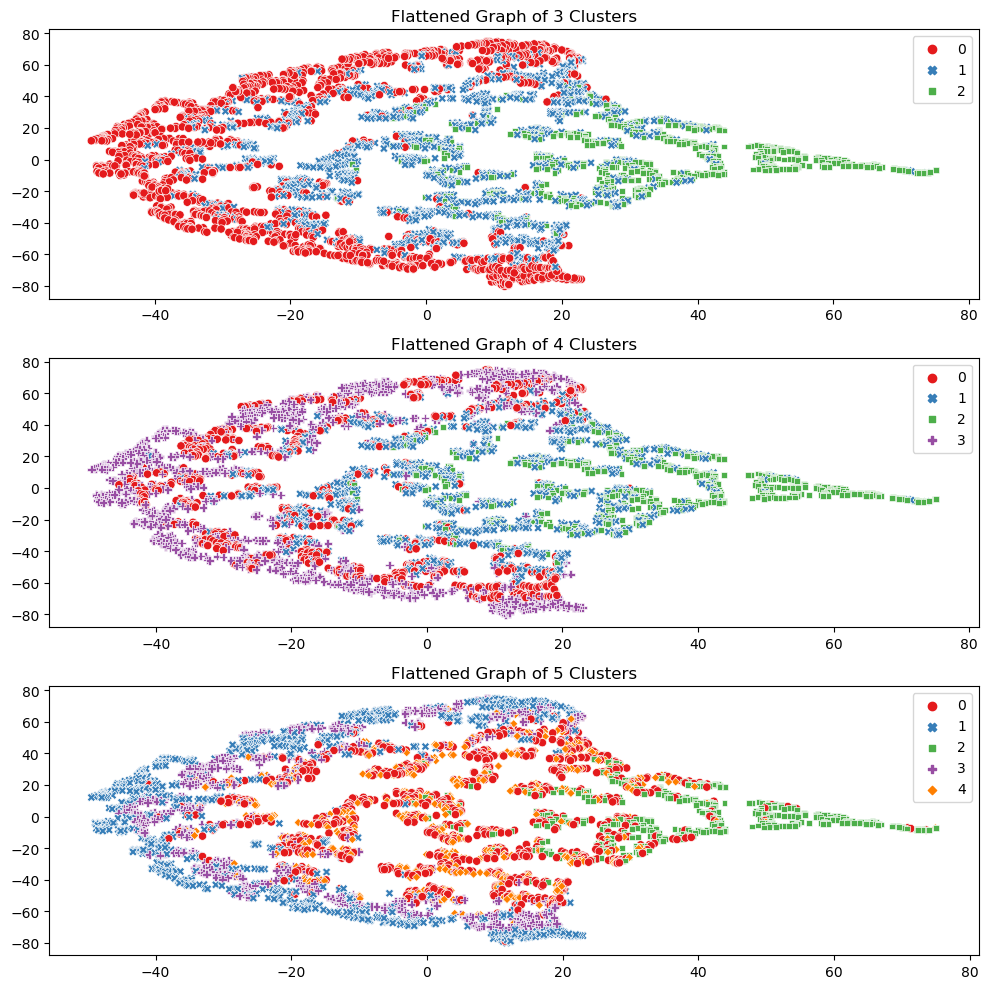

In [40]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(RFM_Table_New_scaled, 3, rfm)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(RFM_Table_New_scaled, 4, rfm)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(RFM_Table_New_scaled, 5, rfm)

plt.tight_layout()


#### Train Model

In [41]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [42]:
print(davies_bouldin_score(X, kmeans.labels_))

1.0534691403903358


In [43]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [44]:
print(davies_bouldin_score(X, kmeans.labels_))

1.0022036956625686


In [45]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [46]:
print(davies_bouldin_score(X, kmeans.labels_))

1.0200535957502224


In [47]:
df_rfm_k4.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,325,1,77183.60,1
1,12747.0,2,11,4196.01,2
2,12748.0,0,209,33719.73,2
3,12749.0,3,5,4090.88,2
4,12820.0,3,4,942.34,0


In [48]:
df_rfm_k4.Cluster.value_counts()

3    1361
1    1038
2     776
0     745
Name: Cluster, dtype: int64

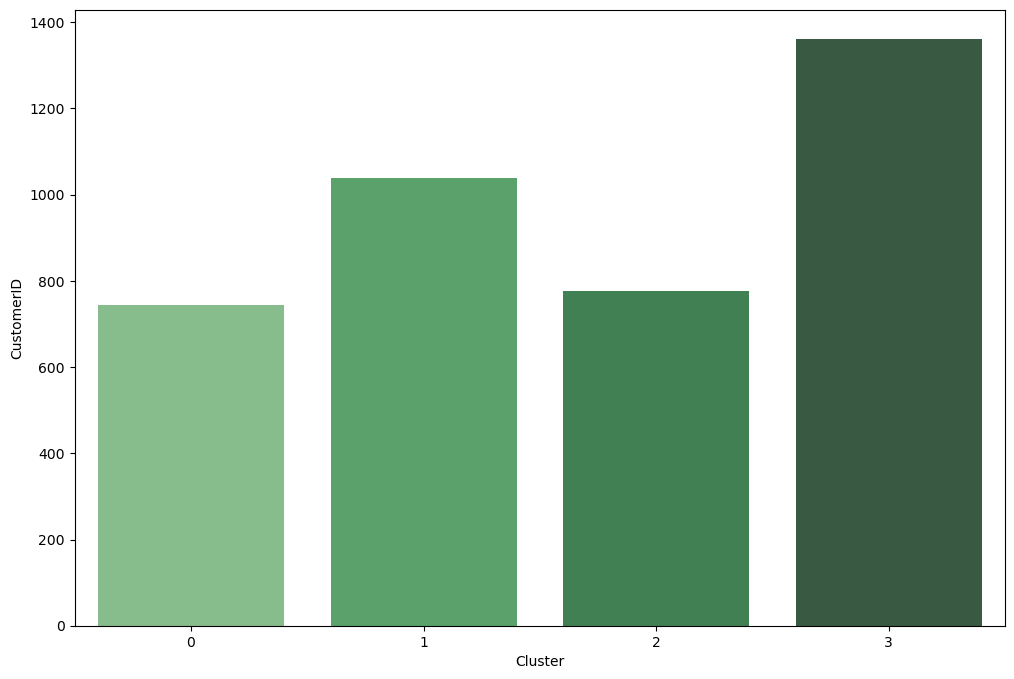

In [49]:
import seaborn as sns
sq1=df_rfm_k4.groupby('Cluster')['CustomerID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
sns.barplot(data=sq1, x="Cluster", y="CustomerID", palette = "Greens_d");

In [50]:
def rfm_values(df):

    df_new = df.groupby(['Cluster']).agg({
        'Recency': ['mean', 'count','max'],
        'Frequency': ['mean', 'count','max'],
        'Monetary': ['mean', 'count','max']
    }).round(0)
    
    return df_new

In [51]:
df_rfm_k4

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,325,1,77183.60,1
1,12747.0,2,11,4196.01,2
2,12748.0,0,209,33719.73,2
3,12749.0,3,5,4090.88,2
4,12820.0,3,4,942.34,0
...,...,...,...,...,...
3915,18280.0,277,1,180.60,3
3916,18281.0,180,1,80.82,3
3917,18282.0,7,2,178.05,0
3918,18283.0,3,16,2094.88,2


In [52]:
rfm_values(df_rfm_k4)

Recency            Frequency            Monetary                
           mean count  max      mean count  max     mean count       max
Cluster                                                                 
0          20.0   745   61       2.0   745    7    471.0   745    3861.0
1          77.0  1038  372       4.0  1038   34   1572.0  1038   77184.0
2          13.0   776  163      12.0   776  209   6319.0   776  259657.0
3         187.0  1361  373       1.0  1361    6    311.0  1361    2002.0

- "Cluster 0" has 29% customers. It belongs to the "Loyal Customers" segment as they Haven’t purchased for some time, but used to purchase frequently (F=2) and spent a lot. (R=3, F=2, M=2)

- "Cluster 1" has 20% customers. It can be interpreted as "Alomost Lost". They purchase recently (R=2). However they do not purchase frequently and do not spent a lot. (R=2, F=3, M=3)

- "Cluster 2" has 30% customers. It can be interpreted as "Lost Cheap Customers". Their last purchase is long ago (R=4), purchased very few (F=4) and spent little (M=4). (R=4, F=4, M=4)

- "Cluster 3" has 21% customers. It belongs to the "Best Customers" segment which we saw earlier as they purchase recently (R=1), frequent buyers (F=1), and spent the most (M=1). (R=1, F=1, M=1)

# Recommendation

- Recommendation for “Best Customers" segment:
Focus on increasing customer purchases therefore it is necessary to form a cross/Up Selling Strategy.
- Recommendation for “Loyal Customers" segment:
The business team must optimize the budget campaign and the time campaign for this customer segment in order to maintain their loyalty and increase their value.
- Recommendation for “Almost Lost" segment:
This customer segment is very at risk for churn, so focus on activating customers and making repurchases by forming a Reactivation Strategy, Retention Strategy.
- Recommendation for “Lost Cheap Customers" segment:
This customer segment has churned, so the focus of the campaign is to reactivate the customer by forming a Reactivation strategy.
